In [100]:
%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
import torch
import dynapsetorch
from dynapsetorch.model import DPIneuron

In [102]:
import numpy as np

KAPPA_N = 0.75
KAPPA_P = 0.66
UT = 25. * 1e-3
I0 = 0.5 * 1e-13
KAPPA = (KAPPA_N+KAPPA_P)/2
KAPPA_2 = KAPPA**2.0
KAPPA_prime = KAPPA_2 / (KAPPA + 1.0)

V2I = lambda x: I0*np.exp(x*KAPPA/UT)
I2V = lambda x: (UT / KAPPA) * np.log(x / I0)

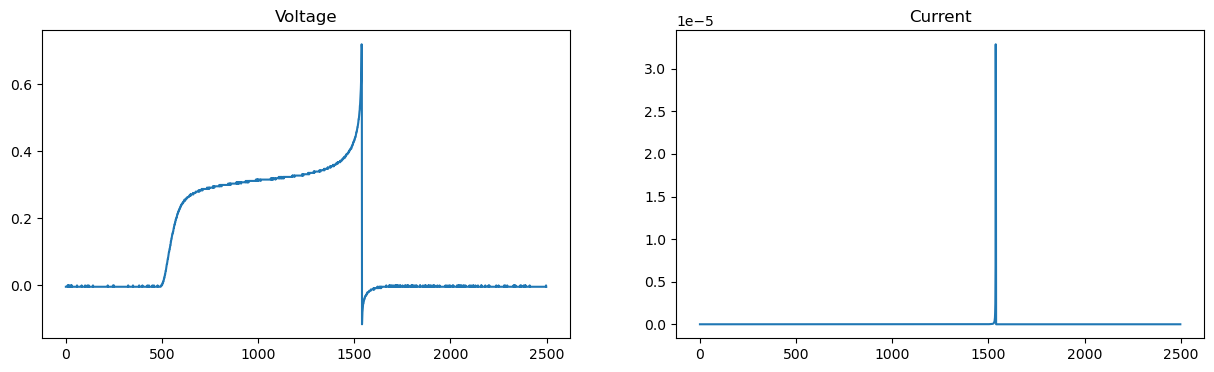

In [133]:
import os
import fnmatch
import pandas as pd
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 4), dpi=100)
# for i in range(len(fnmatch.filter(os.listdir('taucalib'), '*.*'))):
df = pd.read_csv(f'/home/ferqui/dynapse/230607/TEK0001.CSV', header=None)
dt = float(df[1][1])
N = int(float(df[1][0]))
data = df[4].to_numpy() - df[4].to_numpy()[100]

start = 0
end = -1

axs[0].plot(data[start:end], label='DYNAP-SE')
axs[1].plot(V2I(data[start:end]), label='DYNAP-SE')
axs[0].set_title('Voltage')
axs[1].set_title('Current')
plt.show()

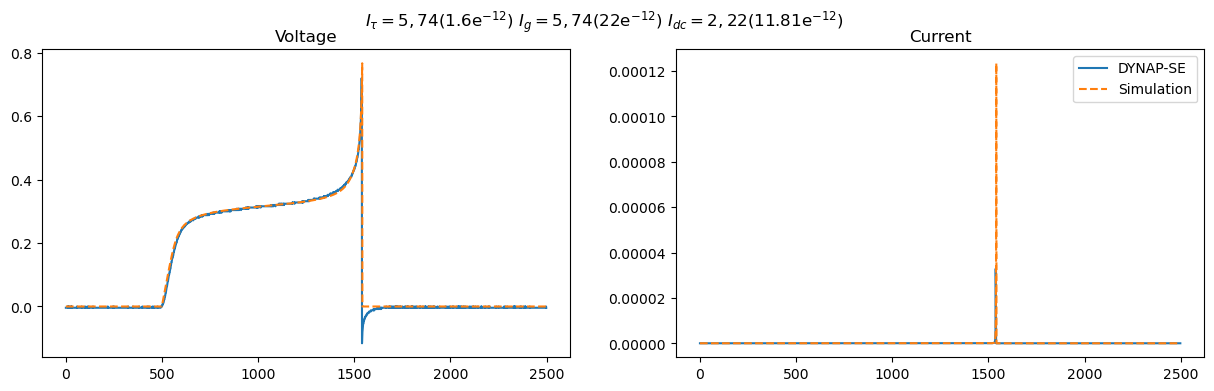

In [140]:
neuron = DPIneuron(1, 1, Idc=0, Itau_mem=1.75e-12, Igain_mem=25e-12, alpha=1.06e9, dt=0.001)
ImemTorch = []
VmemTorch = []
for t in range(500):
    neuron(torch.zeros(1,1))
    ImemTorch.append(neuron.getImem().numpy()[0,0])
    VmemTorch.append(neuron.getVmem().numpy()[0,0])

neuron.Idc.data = torch.tensor(11.81e-12)
for t in range(975):
    neuron(torch.zeros(1,1))
    ImemTorch.append(neuron.getImem().numpy()[0,0])
    VmemTorch.append(neuron.getVmem().numpy()[0,0])

neuron.Idc.data = torch.tensor(0)
for t in range(1025):
    neuron(torch.zeros(1,1))
    ImemTorch.append(neuron.getImem().numpy()[0,0])
    VmemTorch.append(neuron.getVmem().numpy()[0,0])

start = 0
end = -1

fig, axs = plt.subplots(1, 2, figsize=(15, 4), dpi=100)
axs[0].plot(data[start:end], label='DYNAP-SE')
axs[1].plot(V2I(data[start:end]), label='DYNAP-SE')
axs[0].plot(VmemTorch[start:end], '--', label='Simulation')
axs[1].plot(ImemTorch[start:end], '--', label='Simulation')
axs[0].set_title('Voltage')
axs[1].set_title('Current')
fig.suptitle(r'$I_{\tau} = 5,74(1.6\mathrm{e}^{-12})~I_g = 5,74(22\mathrm{e}^{-12})~I_{dc} = 2,22(11.81\mathrm{e}^{-12})$')
plt.legend()
plt.show()


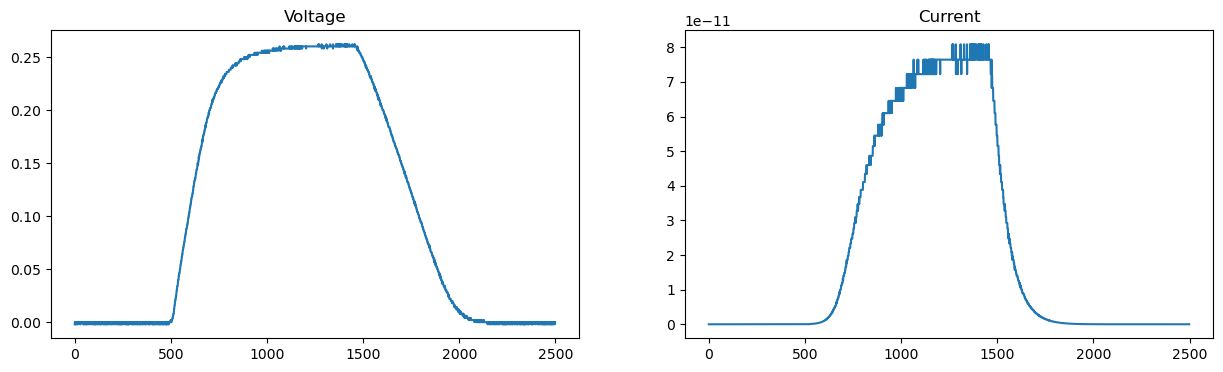

In [141]:
import os
import fnmatch
import pandas as pd
fig, axs = plt.subplots(1, 2, figsize=(15, 4), dpi=100)
# for i in range(len(fnmatch.filter(os.listdir('taucalib'), '*.*'))):
df = pd.read_csv(f'/home/ferqui/dynapse/230607/TEK0000.CSV', header=None)
dt = float(df[1][1])
N = int(float(df[1][0]))
data = df[4].to_numpy() - df[4].to_numpy()[100]

start = 0
end = -1

axs[0].plot(data[start:end], label='DYNAP-SE')
axs[1].plot(V2I(data[start:end]), label='DYNAP-SE')
axs[0].set_title('Voltage')
axs[1].set_title('Current')
plt.show()

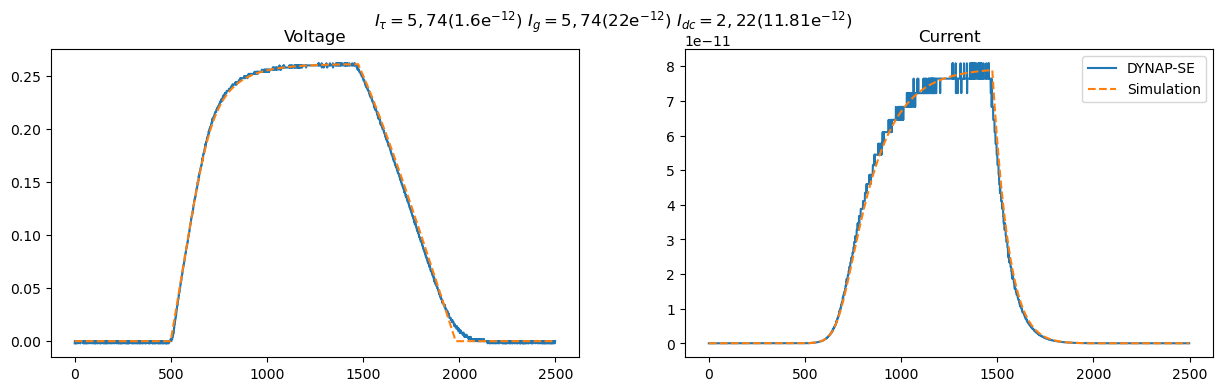

In [142]:
neuron = DPIneuron(1, 1, Idc=0, Itau_mem=1.75e-12, Igain_mem=25e-12, alpha=1.06e9, dt=0.001)
ImemTorch = []
VmemTorch = []
for t in range(500):
    neuron(torch.zeros(1,1))
    ImemTorch.append(neuron.getImem().numpy()[0,0])
    VmemTorch.append(neuron.getVmem().numpy()[0,0])

neuron.Idc.data = torch.tensor(5.0e-12)
for t in range(975):
    neuron(torch.zeros(1,1))
    ImemTorch.append(neuron.getImem().numpy()[0,0])
    VmemTorch.append(neuron.getVmem().numpy()[0,0])

neuron.Idc.data = torch.tensor(0)
for t in range(1025):
    neuron(torch.zeros(1,1))
    ImemTorch.append(neuron.getImem().numpy()[0,0])
    VmemTorch.append(neuron.getVmem().numpy()[0,0])

start = 0
end = -1

fig, axs = plt.subplots(1, 2, figsize=(15, 4), dpi=100)
axs[0].plot(data[start:end], label='DYNAP-SE')
axs[1].plot(V2I(data[start:end]), label='DYNAP-SE')
axs[0].plot(VmemTorch[start:end], '--', label='Simulation')
axs[1].plot(ImemTorch[start:end], '--', label='Simulation')
axs[0].set_title('Voltage')
axs[1].set_title('Current')
fig.suptitle(r'$I_{\tau} = 5,74(1.6\mathrm{e}^{-12})~I_g = 5,74(22\mathrm{e}^{-12})~I_{dc} = 2,22(11.81\mathrm{e}^{-12})$')
plt.legend()
plt.show()